In [2]:
pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------- ------------------------ 61.4/165.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.4/7.8 MB 8.1 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/7.8 MB 10.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.8 MB 11.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 12.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 12.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 12.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.2/7.8 MB 11.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.8 MB 12.1 MB/s eta 0:00:01
   ------------------------- -------------- 4.9/7.8 MB 12.5 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.1/11.0 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.4/11.0 MB 4.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.0 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 9.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/11.0 MB 9.5 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/11.0 MB 9.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 11.3 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 11.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.0 MB 11.7 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.0 MB 11.7 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [18]:
# Load Data
data = pd.read_csv(r'C:\Users\snehi\Downloads\Sales_Data.csv')

# Show basic information
print(data.info())

# Display first few rows
print(data.head(5))

# Summary statistics
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Number      2841 non-null   int64  
 1   Order_Date        2841 non-null   object 
 2   Line_Item_Number  2841 non-null   int64  
 3   Quantity_Ordered  2838 non-null   float64
 4   Price_Each        2838 non-null   float64
 5   Sales             2838 non-null   float64
 6   Status            2841 non-null   object 
 7   Product_Category  2838 non-null   object 
 8   Has_MSRP          2841 non-null   int64  
 9   Product_Code      2838 non-null   object 
 10  Deal_Size         2841 non-null   object 
 11  Customer_Name     2841 non-null   object 
 12  Customer_ID       2841 non-null   int64  
 13  Customer_Status   2841 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 310.9+ KB
None
   Order_Number  Order_Date  Line_Item_Number  Quantity_Ordered  Price_E

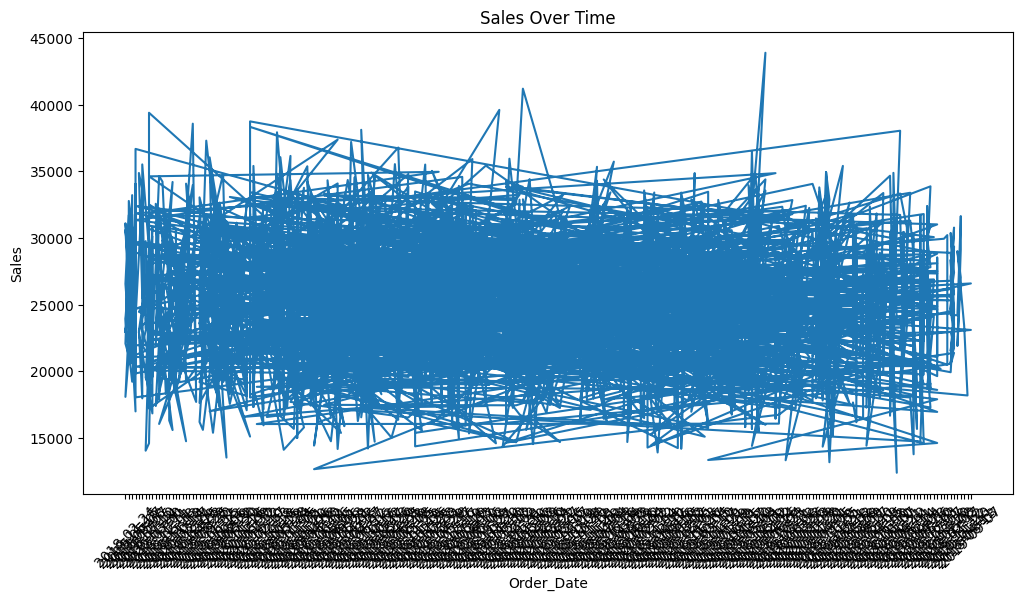

In [19]:
# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(data['Order_Date'], data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Order_Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [21]:
type(data['Order_Date'])

pandas.core.series.Series

In [24]:
# Convert 'date' to datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Extract additional features from 'date'
data['month'] = data['Order_Date'].dt.month
data['day_of_week'] = data['Order_Date'].dt.dayofweek
data['day'] = data['Order_Date'].dt.day


In [25]:
data.head(5)

,Order_Number,Order_Date,Line_Item_Number,Quantity_Ordered,Price_Each,Sales,Status,Product_Category,Has_MSRP,Product_Code,Deal_Size,Customer_Name,Customer_ID,Customer_Status,month,day_of_week,day
0,10107,2018-02-24,2,108.0,300.24,22947.88,Shipped,Poultry,1,S10_1678,Small,COSTCO,81313,Active,2,5,24
1,10329,2019-11-15,1,139.0,300.24,29545.29,Shipped,Poultry,1,S10_1678,Medium,COSTCO,81313,Active,11,4,15
2,10107,2018-02-24,5,120.0,286.12,22067.15,Shipped,Poultry,1,S10_2016,Medium,COSTCO,81313,Active,2,5,24
3,10329,2019-11-15,2,115.0,286.12,21173.97,Shipped,Poultry,1,S10_2016,Medium,COSTCO,81313,Active,11,4,15
4,10107,2018-02-24,4,117.0,311.00,23934.16,Shipped,Poultry,1,S10_4698,Medium,COSTCO,81313,Active,2,5,24


In [26]:
# Check for missing values
print(data.isnull().sum())

Order_Number        0
Order_Date          0
Line_Item_Number    0
Quantity_Ordered    3
Price_Each          3
Sales               3
Status              0
Product_Category    3
Has_MSRP            0
Product_Code        3
Deal_Size           0
Customer_Name       0
Customer_ID         0
Customer_Status     0
month               0
day_of_week         0
day                 0
dtype: int64


In [27]:
data.fillna(method='ffill', inplace=True) # Forward fill


C:\Users\snehi\AppData\Local\Temp\ipykernel_13060\3098297224.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True) # Forward fill


In [28]:
print(data.isnull().sum())

Order_Number        0
Order_Date          0
Line_Item_Number    0
Quantity_Ordered    0
Price_Each          0
Sales               0
Status              0
Product_Category    0
Has_MSRP            0
Product_Code        0
Deal_Size           0
Customer_Name       0
Customer_ID         0
Customer_Status     0
month               0
day_of_week         0
day                 0
dtype: int64


In [31]:
print(data.describe())

       Order_Number                     Order_Date  Line_Item_Number  \
count   2841.000000                           2841      2.841000e+03   
mean   10258.713129  2019-05-11 13:03:06.272439296      3.476497e+05   
min    10100.000000            2018-01-06 00:00:00      1.000000e+00   
25%    10180.000000            2018-11-07 00:00:00      3.000000e+00   
50%    10262.000000            2019-06-15 00:00:00      6.000000e+00   
75%    10333.000000            2019-11-17 00:00:00      9.000000e+00   
max    10425.000000            2020-05-31 00:00:00      9.876543e+08   
std       92.030654                            NaN      1.852974e+07   

       Quantity_Ordered     Price_Each        Sales  Has_MSRP   Customer_ID  \
count       2841.000000    2841.000000   2841.00000    2841.0   2841.000000   
mean         135.153115     637.266902  24897.78126       1.0  68040.146779   
min           86.000000     207.000000  12366.60000       1.0  32332.000000   
25%          123.000000     262.070

In [33]:
# Example: Creating lag features
data['sales_lag1'] = data['Sales'].shift(1)
data['sales_lag2'] = data['Sales'].shift(2)

# Drop rows with NaN values due to lagging
data.dropna(inplace=True)


In [35]:
# Define features and target
X = data[['month', 'day_of_week', 'day', 'sales_lag1', 'sales_lag2']]
y = data['Sales']


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [38]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LinearRegression()

In [39]:
# Predict on test set
y_pred = model.predict(X_test_scaled)


Mean Absolute Error (MAE): 3809.1336447301082
Root Mean Squared Error (RMSE): 4650.095235269107


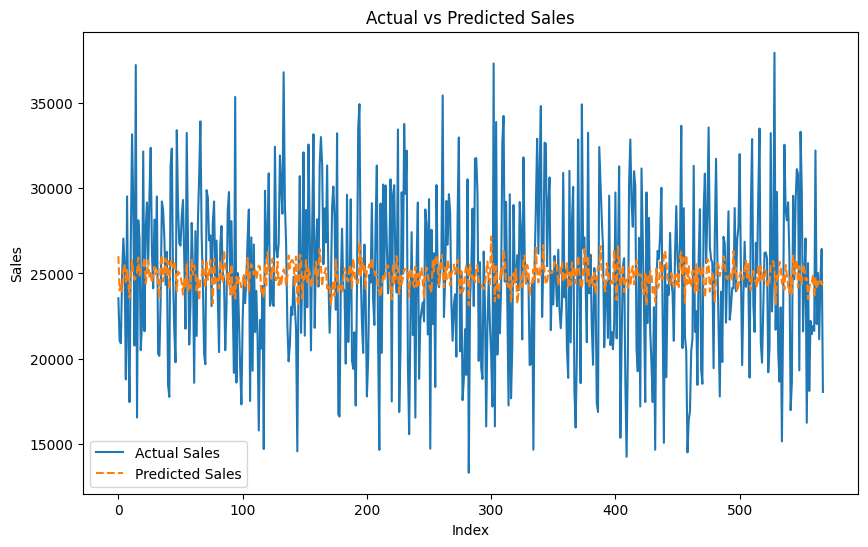

In [40]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [41]:
import joblib

# Save the trained model
joblib.dump(model, 'sales_forecasting_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [42]:
# Load the model
model = joblib.load('sales_forecasting_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Prepare new data for prediction
new_data = pd.DataFrame({
    'month': [8],
    'day_of_week': [6],
    'day': [25],
    'sales_lag1': [200],
    'sales_lag2': [180]
})

# Scale new data
new_data_scaled = scaler.transform(new_data)

# Make prediction
forecast = model.predict(new_data_scaled)
print('Forecasted Sales:', forecast)


Forecasted Sales: [20288.06914038]


In [45]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
rf_y_pred = best_rf_model.predict(X_test_scaled)

# Recalculate metrics
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Optimized Random Forest Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Optimized Random Forest Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Optimized Random Forest R² Score: {rf_r2:.2f}")


Optimized Random Forest Mean Absolute Error (MAE): 3866.12
Optimized Random Forest Root Mean Squared Error (RMSE): 4713.52
Optimized Random Forest R² Score: 0.01


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
rf_y_pred = best_rf_model.predict(X_test_scaled)

# Recalculate metrics
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Optimized Random Forest Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Optimized Random Forest Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Optimized Random Forest R² Score: {rf_r2:.2f}")


Optimized Random Forest Mean Absolute Error (MAE): 3866.12
Optimized Random Forest Root Mean Squared Error (RMSE): 4713.52
Optimized Random Forest R² Score: 0.01


In [53]:
# Load the model
model = joblib.load('sales_forecasting_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Prepare new data for prediction
new_data = pd.DataFrame({
    'month': [8],
    'day_of_week': [6],
    'day': [25],
    'sales_lag1': [200],
    'sales_lag2': [180]
})

# Scale new data
new_data_scaled = scaler.transform(new_data)

# Make prediction
forecast = model.predict(new_data_scaled)
print('Forecasted Sales:', forecast)


Forecasted Sales: [20288.06914038]
